# Demo: Implicit SINDy example subtilis_competence

### created by Yi Chu, 12/05/18

In [12]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [13]:
import numpy as np
import scipy as sp
import scipy.integrate as integrate
from pySINDy.sindypde import SINDyPDE
from pySINDy.isindy import ISINDy

In [26]:
def subtilis_competence(t, S):
    _s_1 = S[0]

    a1 = 0.6

    v1 = a1 - (1.5 * _s_1) / (0.3 + _s_1)

    return [v1]

In [27]:
n = 1
dt = 0.1
tspan = np.arange(0, 1 + dt, dt)
len_t = len(tspan)
# options = odeset('RelTol',1e-7,'AbsTol',1e-7)

sss = 100
np.random.seed(12345)
Sinit = np.random.rand(n)
Sinit = np.random.rand(sss,n)
Sinit = np.concatenate((Sinit, 2*np.random.rand(sss,n)))
Sinit = np.concatenate((Sinit, 3*np.random.rand(sss,n)))
measure = len(Sinit)

tt = np.empty((len_t,measure))
x = np.empty((len_t,n,measure))
for ii in range(measure - 1):
    sol = integrate.solve_ivp(subtilis_competence, [0, len_t], Sinit[ii,:],
                                 t_eval=tspan, rtol = 1e-7, atol = 1e-7)
    tt[:,ii] = sol.t
    x[:,:,ii] = sol.y.T

xn = x
xt = np.empty((0,n))
dxt= np.empty(xt.shape)
t = np.empty((0,))
dxf = np.empty((len_t,n,measure))
for ll in range (measure):
    for ii in range(len_t):
        dxf[ii,:,ll] = subtilis_competence(t,xn[ii,:, ll])
    
    dxt = np.concatenate((dxt, dxf[:,:,ll]))
    xt = np.concatenate((xt, xn[:,:,ll]))
    t = np.concatenate((t, tt[:, ll]))

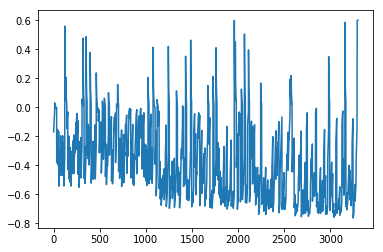

In [29]:
import matplotlib.pyplot as plt
plt.plot(dxt)

In [31]:
xt

array([[0.31637555],
       [0.30036749],
       [0.28623702],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])

In [16]:
xt.shape

(3030, 2)

In [8]:
isindy_model = ISINDy(name = 'isindy')
data = isindy_model.fit(xt.T, 0.01, poly_degree=5)

In [11]:
data.

array([[ 0.40330945,  0.        ],
       [-0.12416608,  0.        ],
       [-0.33996858,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.11619546, -0.29184962],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.09199928],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.05061983,  0.        ],
       [ 0.18784835,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.0128473 ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.00793679,  0.01636056],
       [-0.00736496,  0.        ],
       [ 0.46088531,  0.18980187],
       [ 0.        , -0.91650844],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.16862658],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,

In [ ]:
isindy_model.coefficients()

In [ ]:
isindy_model.descriptions()